In [30]:
! pip install --upgrade scikit-learn

     |████████████████████████████████| 22.2MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
! python -m spacy download en_core_web_md

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1PL13wgXLfXcsrkKNuVIaNJdGXrIqv2mv'
output = 'book_crossing.cleaned.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PL13wgXLfXcsrkKNuVIaNJdGXrIqv2mv
To: /content/book_crossing.cleaned.csv
44.9MB [00:01, 40.7MB/s]


'book_crossing.cleaned.csv'

In [2]:
%matplotlib inline

import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set()
palette = sns.color_palette("icefire")

plt.style.use('ggplot')

sns.set_context("talk")

In [154]:
dataset = pd.read_csv('book_crossing.cleaned.csv')

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383849 entries, 0 to 383848
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              383849 non-null  int64 
 1   age                  383849 non-null  int64 
 2   isbn                 383849 non-null  object
 3   book_rating          383849 non-null  int64 
 4   book_title           383849 non-null  object
 5   book_author          383849 non-null  object
 6   year_of_publication  383849 non-null  int64 
 7   publisher            383849 non-null  object
 8   city                 375223 non-null  object
 9   state                371248 non-null  object
 10  country              366406 non-null  object
dtypes: int64(4), object(7)
memory usage: 32.2+ MB


We won't be considering city, state, because they don't really tell a lot of the rating of a book, but also most of the users (~70%) are from usa (which may not contribute a lot to accuracy of classification, but we'll consider it), and the location is realated to the user, and not the book directly, we'll also be dropping isbn, user_id, since they dont contribute to classification of rating

In [156]:
dataset = dataset.drop(['user_id', 'isbn', 'city', 'state'], axis=1)

In [157]:
f'Dataset Shape : {dataset.shape}'

'Dataset Shape : (383849, 7)'

In [158]:
dataset.dropna(inplace=True)

In [159]:
f'Dataset Shape after dropping NA: {dataset.shape}'

'Dataset Shape after dropping NA: (366406, 7)'

In [160]:
dataset.head()

,age,book_rating,book_title,book_author,year_of_publication,publisher,country
0,34,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,30,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,34,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,34,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
6,34,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [161]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,366406.0,35.860998,10.448608,5.0,30.0,34.0,40.0,100.0
book_rating,366406.0,7.635975,1.836354,1.0,7.0,8.0,9.0,10.0
year_of_publication,366406.0,1995.670314,7.397156,1376.0,1993.0,1997.0,2001.0,2006.0


We'll remove the rows which have a country which has value count <= 50

In [162]:
dataset = dataset.groupby('country').filter(lambda x: len(x) > 50)

In [163]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,364570.0,35.867227,10.447887,5.0,30.0,34.0,40.0,100.0
book_rating,364570.0,7.636709,1.835857,1.0,7.0,8.0,9.0,10.0
year_of_publication,364570.0,1995.667164,7.400552,1376.0,1993.0,1997.0,2001.0,2006.0


In [164]:
f'Dataset Shape : {dataset.shape}'

'Dataset Shape : (364570, 7)'

In [43]:
f'Column Names: {dataset.columns.to_list()}'

"Column Names: ['age', 'book_rating', 'book_title', 'book_author', 'year_of_publication', 'publisher', 'country']"

In [44]:
dataset['book_rating'].value_counts()

8     87090
10    68038
7     63036
9     58080
5     42988
6     29943
4      7120
3      4746
2      2198
1      1331
Name: book_rating, dtype: int64

We'll now convert the rating into classification categories

In [45]:
bins = [0, 3, 7, 10]
names = ['low', 'mid', 'high']

dataset['book_rating'] = pd.cut(dataset['book_rating'], bins, labels=names)

In [46]:
dataset.head()

,age,book_rating,book_title,book_author,year_of_publication,publisher,country
0,34,mid,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,30,high,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,34,high,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,34,high,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
6,34,high,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [50]:
dataset['book_rating'].value_counts()

high    213208
mid     143087
low       8275
Name: book_rating, dtype: int64

In [51]:
dataset.to_csv('book_crossing.classification.cleaned.csv', index=False)

---

# Book Crossing - Classification

In [4]:
%matplotlib inline

import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set()
palette = sns.color_palette("icefire")

plt.style.use('ggplot')

sns.set_context("talk")

In [5]:
dataset = pd.read_csv('book_crossing.classification.cleaned.csv')

In [6]:
dataset['age'] = dataset['age'].astype(np.float64)
dataset['book_rating'] = dataset['book_rating'].astype('category')
dataset['book_title'] = dataset['book_title'].astype('category')
dataset['book_author'] = dataset['book_author'].astype('category')
dataset['year_of_publication'] = dataset['year_of_publication'].astype(np.float64)
dataset['publisher'] = dataset['publisher'].astype('category')
dataset['country'] = dataset['country'].astype('category')

In [7]:
dataset.head()

,age,book_rating,book_title,book_author,year_of_publication,publisher,country
0,34.0,mid,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
1,30.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
2,34.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
3,34.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada
4,34.0,high,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,canada


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364570 entries, 0 to 364569
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  364570 non-null  float64 
 1   book_rating          364570 non-null  category
 2   book_title           364570 non-null  category
 3   book_author          364570 non-null  category
 4   year_of_publication  364570 non-null  float64 
 5   publisher            364570 non-null  category
 6   country              364570 non-null  category
dtypes: category(5), float64(2)
memory usage: 19.1 MB


In [9]:
c_dataset = dataset["book_title"].astype(str) + " "  + \
            dataset["book_author"].astype(str) + " " + \
            dataset["publisher"].astype(str) + " " + \
            dataset["year_of_publication"].astype(str) + " " + \
            dataset["age"].astype(str)

In [10]:
c_dataset[0]

'Clara Callan Richard Bruce Wright HarperFlamingo Canada 2001.0 34.0'

In [1]:
import spacy 
from sklearn.base import BaseEstimator, TransformerMixin
import en_core_web_md

nlp = en_core_web_md.load()

In [17]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.cluster import KMeans, DBSCAN, Birch, MiniBatchKMeans, SpectralClustering, AgglomerativeClustering, MeanShift, AffinityPropagation, OPTICS
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

set_config(display='diagram')

In [2]:
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        return [self.nlp(text).vector for text in X]

In [11]:
X, y = c_dataset, dataset['book_rating']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", AgglomerativeClustering()),
    ]
)
embeddings_pipeline.fit(X_test[:20], y_test[:20])

Pipeline(steps=[('mean_embeddings',
                 SpacyVectorTransformer(nlp=<spacy.lang.en.English object at 0x7fee774e1908>)),
                ('reduce_dim', TruncatedSVD(n_components=50)),
                ('classifier', AgglomerativeClustering())])

In [ ]:
y_true = y_test.copy()
y_pred = embeddings_pipeline.fit_predict(X_test, y_test)

In [ ]:
print(classification_report(y_true, y_pred, target_names=['low', 'mid', 'high']))

              precision    recall  f1-score   support

         low       0.60      0.59      0.59      4248
         mid       0.02      0.16      0.04       161
        high       0.41      0.26      0.32      2883

    accuracy                           0.45      7292
   macro avg       0.34      0.34      0.32      7292
weighted avg       0.51      0.45      0.47      7292



In [17]:
small_dataset = dataset.sample(frac=0.1)

In [3]:
X, y = small_dataset.drop('book_rating', axis=1), small_dataset['book_rating'].astype('category')

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# X, y = dataset.drop('book_rating', axis=1), dataset['book_rating']

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 324494 to 72941
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  36457 non-null  float64 
 1   book_title           36457 non-null  category
 2   book_author          36457 non-null  category
 3   year_of_publication  36457 non-null  float64 
 4   publisher            36457 non-null  category
 5   country              36457 non-null  category
dtypes: category(4), float64(2)
memory usage: 10.6 MB


In [21]:
X.head()

,age,book_title,book_author,year_of_publication,publisher,country
324494,49.0,Permanent New Yorkers: A Biographical Guide to...,Judi Culbertson,1987.0,Chelsea Green Pub Co,usa
284522,34.0,"Letters of the Century: America, 1900-1999",Lisa Grunwald,1999.0,Dial Press,usa
16696,43.0,Waiting,Frank M. Robinson,2000.0,Tor Books,usa
258226,34.0,Kiss and Make-Up,Gene Simmons,2001.0,Crown Publishers,usa
306680,35.0,Different Seasons,Stephen King,1983.0,Signet Book,usa


In [22]:
y.head()

324494    high
284522    high
16696     high
258226     mid
306680    high
Name: book_rating, dtype: category
Categories (3, object): ['high', 'low', 'mid']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [89]:
numeric_features = ['age', 'year_of_publication']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler(quantile_range=(25, 75)))])

In [90]:
categorical_features = ['book_title', 'book_author', 'publisher', 'country']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

TODO: play around with all the scalers

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Models to try

- Supervised
    - SGDClassifier
- Unsupervised

TODO: test accuracies of all the models

In [92]:
# unsupervised
km = KMeans(n_clusters=3) # works (needs remap of output)
dbscan = DBSCAN()
birch = Birch() # crash
mbkm = MiniBatchKMeans() # works (needs remap of output)
sc = SpectralClustering() # crash
ac = AgglomerativeClustering() # sparse not supported
ms = MeanShift(bandwidth=3) # sparse not supported
ap = AffinityPropagation() # crash
oo = OPTICS() # sparse not supported

# supervised
dtc = DecisionTreeClassifier()
mlp = MLPClassifier(alpha=1, max_iter=100)
svc = SVC(gamma=2, C=1)
lsvc = LinearSVC()
knc = KNeighborsClassifier()
rc = RidgeClassifier(tol=1e-2, solver="auto") # works
pac = PassiveAggressiveClassifier() # works
abc = AdaBoostClassifier() # works
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))

In [93]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lsvc)])

In [94]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler(quantile_range=(25,
                                                                                                75)))]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier', LinearSVC())])

In [95]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler(quantile_range=(25,
                                                                                                75)))]),
                                                  ['age',
                                                   'year_of_publication']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'country'])])),
                ('classifier', LinearSVC())])

In [96]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.568


In [40]:
y_true = y_test.copy()
y_pred = clf.predict(X_test)

In [41]:
y_pred = np.array(list(map(lambda x: "low" if x == 0 else "mid" if x == 1 else "high", y_pred)))

In [42]:
print(classification_report(y_true, y_pred, target_names=['low', 'mid', 'high']))

              precision    recall  f1-score   support

         low       0.60      0.59      0.59      4248
         mid       0.02      0.16      0.04       161
        high       0.41      0.26      0.32      2883

    accuracy                           0.45      7292
   macro avg       0.34      0.34      0.32      7292
weighted avg       0.51      0.45      0.47      7292



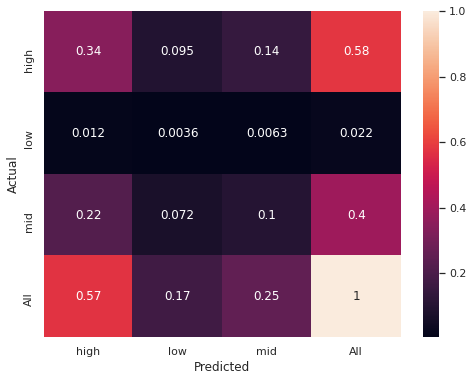

In [43]:
cmmat_table = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
conmat = pd.crosstab(cmmat_table.y_true, cmmat_table.y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(conmat, annot=True)
plt.show()